# Task A - 1D Linear and non-linear regression - using simple FANNs

## (a) Creating your own Synthetic data

In [ ]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

a_true = 5.0 # choose your own value here
b_true = 3.0 # choose your own value here
sigma_epsilon = 5.0 #choose your own noise level here

X = np.random.uniform(0, 10, 250) # sample a bunch of #x_n in [0,10]
y_obs = a_true * X + b_true + sigma_epsilon * np.random.randn(len(X)) # linear relationship embedded in 7
X = torch.tensor(X).reshape(len(X),1).float() # comment about each row being a data-pair
y_obs = torch.tensor(y_obs).reshape(len(y_obs),1).float()

Plot the dataset

Text(0, 0.5, 'y')

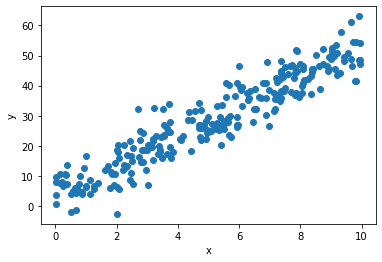

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y_obs, label = "Y true")
plt.xlabel('x')
plt.ylabel('y')

##(b) Make a PyTorch dataset object

In [ ]:
my_dataset = TensorDataset(X, y_obs)
my_dataloader = DataLoader(my_dataset, batch_size = 50, shuffle = True)

## (c) Create the following network in PyTorch

In [ ]:
# Defining the single neuron having 1 input
model = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 1)
)

## (d) Is this a regression problem or a classification problem?

In [ ]:
cost_function = nn.MSELoss() # Cost function for regression problem

## (e) Choose you optimizer

In [ ]:
optim = torch.optim.SGD(model.parameters(), lr = 0.01)

## (f) Train the model

In [ ]:
training_minibatch_Js =[]
nr_epochs = 10
for epoch_i in range(nr_epochs):
    for X_batch, y_batch in my_dataloader:
        y_preds = model(X_batch) # Make predection on batch
        cost = cost_function(y_preds, y_batch) # Compute cost
        training_minibatch_Js.append(cost)
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        optim.step() # take one update step for all model params

Plot the cost

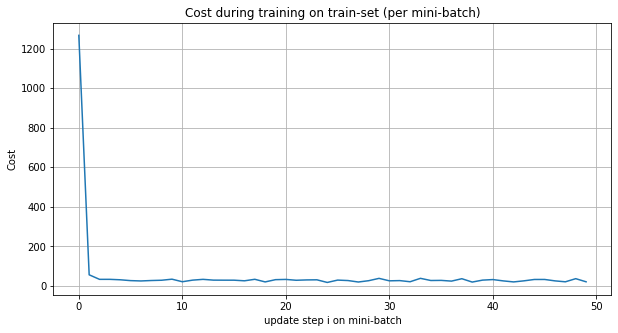

In [ ]:
import matplotlib.pyplot as plt

# total number of steps = minibatch * epoch = (250 / 50) * 10

# Plot the cost
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()

In [ ]:
print("Final cost: {}.".format(training_minibatch_Js[-1]))

Final cost: 21.001977920532227.


## (g) Use your fitted model to make predictions

In [ ]:
with torch.no_grad():
    y_preds = model(X)

Plot the fitted model and the dataset together

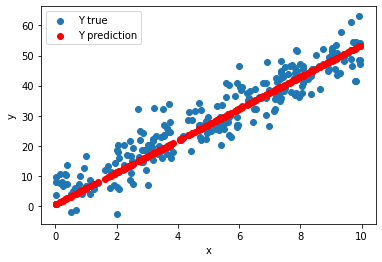

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y_obs, label = "Y true")
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X, y_preds, color = "red", label = "Y prediction")
plt.legend()
plt.show()

## (h) Determine and look at the final model parameters.

In [ ]:
# Print all parameters in the neural network model
for p in model.named_parameters():
    print(p)

('0.weight', Parameter containing:
tensor([[5.2843]], requires_grad=True))
('0.bias', Parameter containing:
tensor([0.6303], requires_grad=True))


## (i) Repeat the above steps (b)-(h) for the MarvinMinsky.csv dataset

In [ ]:
from numpy import genfromtxt # we use this to load data from a csv into a numpy array
my_data = genfromtxt(
    'dataset_Marvin_Minsky.csv', 
    delimiter = ',', 
    skip_header = 1) 
X = my_data[:,0] #Extract the x_n
y_obs = my_data[:,1] #Extract the y_n

# comment about each row being a data-pair # reshape to make each row in X a data-pint x_n
X = torch.tensor(X).reshape(len(X),1).float()
# turn to column vector, each row corresponds to each y_n
y_obs = torch.tensor(y_obs).reshape(len(y_obs),1).float()

my_dataset = TensorDataset(X, y_obs) # create your dataset by turning tensors into datasets objects
my_dataloader = DataLoader(my_dataset, batch_size = 50, shuffle = True) # create your dataloader

Plot the dataset

Text(0, 0.5, 'y')

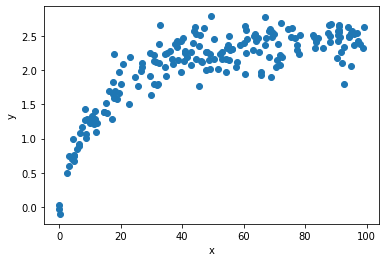

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y_obs, label = "Y true")
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# Defining the single neuron having 1 input
model = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 5),
    nn.ReLU(),
    nn.Linear(in_features = 5, out_features = 5),
    nn.ReLU(),
    nn.Linear(in_features = 5, out_features = 5),
    nn.Tanh(),
    nn.Linear(in_features = 5, out_features = 1)
)

# Cost function for regression problem
cost_function = nn.MSELoss() 

optim = torch.optim.SGD(model.parameters(), lr = 0.01)

training_minibatch_Js = []
nr_epochs = 100
for epoch_i in range(nr_epochs):
    for X_batch, y_batch in my_dataloader:
        y_preds = model(X_batch) # Make predection on batch
        cost = cost_function(y_preds, y_batch) # Compute cost
        training_minibatch_Js.append(cost)
        optim.zero_grad() # zero the grads of all model params
        cost.backward() # compute J gradient of all model params
        optim.step() # take one update step for all model params

Plot the cost

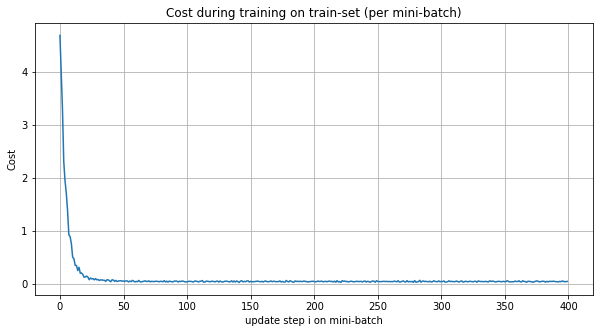

In [ ]:
import matplotlib.pyplot as plt

# total number of steps = minibatch * epoch = (250 / 50) * 100

# Plot the cost
plt.figure(figsize=[10,5])
plt.plot(training_minibatch_Js)
plt.xlabel('update step i on mini-batch')
plt.ylabel('Cost')
plt.title('Cost during training on train-set (per mini-batch)')
plt.grid()

In [ ]:
print("Final cost: {}.".format(training_minibatch_Js[-1]))

Final cost: 0.04257679358124733.


Print all parameters in the neural network model

In [ ]:
# Print all parameters in the neural network model
for p in model.named_parameters():
    print(p)

('0.weight', Parameter containing:
tensor([[ 0.0564],
        [-0.1318],
        [-0.4120],
        [ 0.3429],
        [ 0.5965]], requires_grad=True))
('0.bias', Parameter containing:
tensor([ 0.3258,  0.5534, -0.9102,  0.6144,  0.9723], requires_grad=True))
('2.weight', Parameter containing:
tensor([[-2.2701e-01, -1.5702e-02,  5.9379e-02, -9.1126e-03, -9.6754e-02],
        [ 2.7422e-02,  3.1524e-01,  1.3659e-04, -8.5985e-02,  3.3316e-01],
        [-3.7085e-01, -1.9215e-01, -1.8920e-01, -2.6416e-01,  3.1361e-01],
        [ 5.1275e-02,  3.3455e-02,  1.7410e-01,  4.5127e-01,  2.3877e-01],
        [-9.7355e-03,  2.9969e-01, -2.9446e-01, -2.4526e-01, -3.6484e-01]],
       requires_grad=True))
('2.bias', Parameter containing:
tensor([-0.1716,  0.4419, -0.3987,  0.3738, -0.3798], requires_grad=True))
('4.weight', Parameter containing:
tensor([[-0.3321, -0.3758,  0.2856,  0.3037, -0.0091],
        [ 0.0458, -0.3585,  0.3995, -0.1585, -0.0223],
        [-0.1964,  0.0084,  0.2850, -0.3062,  0.

In [ ]:
# Use the fitted model to make predictions
with torch.no_grad():
    y_preds = model(X)

Plot the fitting model and the dataset together

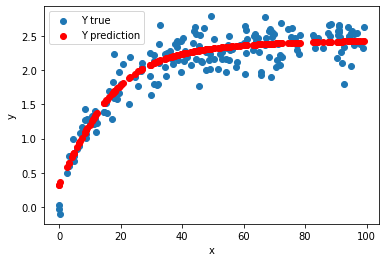

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y_obs, label = "Y true")
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X, y_preds, color = "red", label = "Y prediction")
plt.legend()
plt.show()